## Our packages 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from queue import Queue
from moviepy.editor import VideoFileClip


# Fixing  Calibration of camera and disortion

In the beginning we have to fix the coming light disortion done by the camera lenses via calibrating our images againsts asymmetric chess boards images then generating distortion moel and that help lens distortions through turning our images into grayscale and applying function cv2.findChessboardCorners() and cv2.CalibrateCamera() function to acquire the camera matrix and the coefficients of distortion after that we can use function c2.undistort()  in order to fix our remaining data inputs


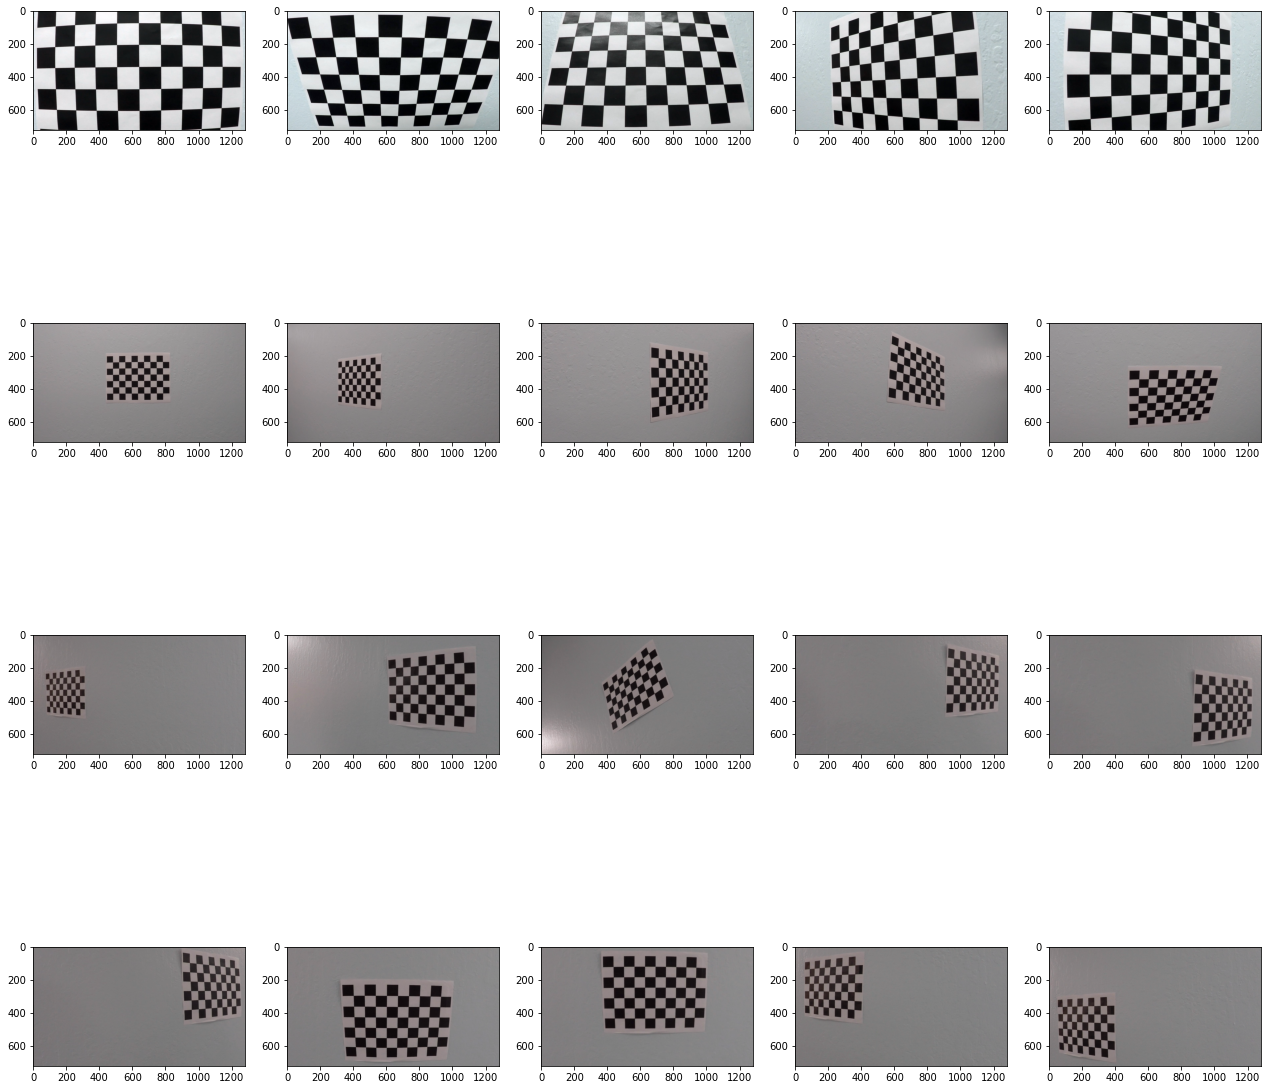

In [2]:
f,axes= plt.subplots(4,5, figsize=(22,22))
row=0
col=0
distorted=[]

for x in range(20):
    image= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/chess/calibration"+str(x+1)+".jpg")
    distorted.append(image)
    axes[row,col].imshow(image)
    col+=1
    if(col==5):
        col=0
        row+=1

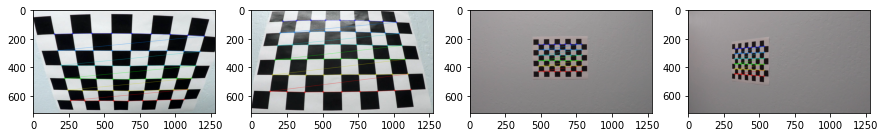

In [3]:
f,axes= plt.subplots(1,4, figsize=(15,15))
row=0
nx=9
ny=6
objpoints=[]
imgpoints=[]
objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2) 
#finding the corners in the chessboard
for image in distorted:
    
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, corners= cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if(ret):
        objpoints.append(objp)
        imgpoints.append(corners)
        if row>3:
            continue
        cv2.drawChessboardCorners(image,(nx,ny), corners, ret)
        axes[row].imshow(image)             
        row+=1

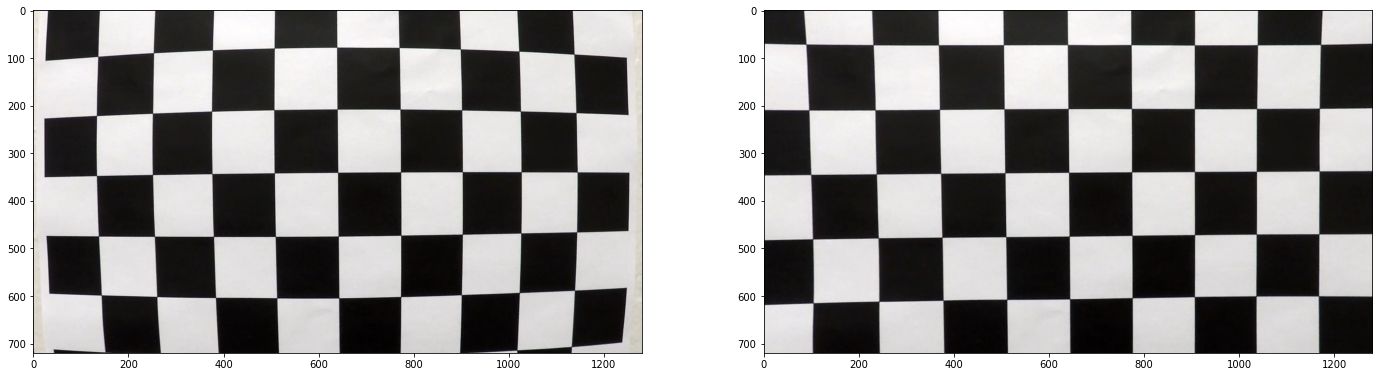

In [4]:
image_test= cv2.cvtColor(cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/chess/calibration1.jpg"),cv2.COLOR_BGR2RGB)
b=image_test.shape[0]
a=image_test.shape[1]
#giving image as input by function calibratecamera and getting a mitrax which used for disorting coming images
_,mtx,dist,_,_= cv2.calibrateCamera(objpoints, imgpoints,(b,a),None,None)#matrix
undistorted_image= cv2.undistort(image_test,mtx,dist, None, mtx)
f,axes= plt.subplots(1,2, figsize=(24,9))
axes[0].imshow(image_test)
axes[1].imshow(undistorted_image)

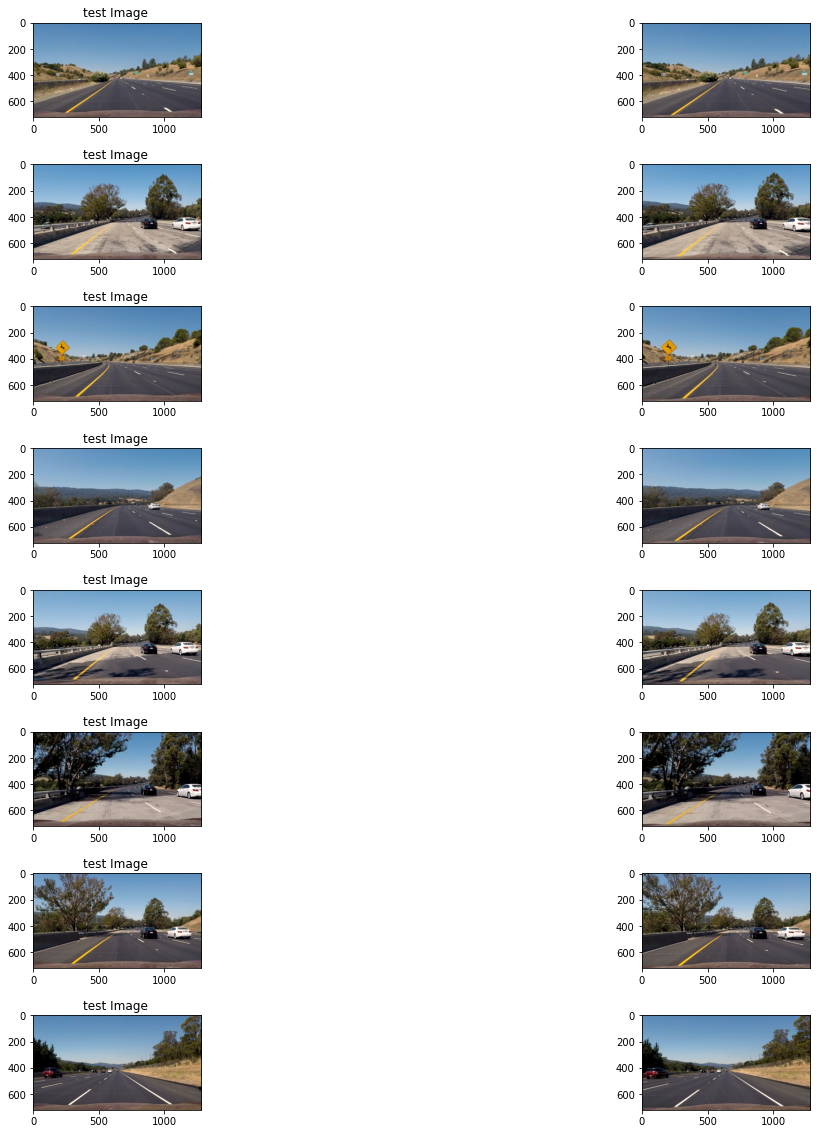

In [5]:
#undisorting test images by the matrix

image_test1= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/line1.jpg")
image_test8=cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/line2.jpg")
image_test2= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test1.jpg")
image_test3= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test2.jpg")
image_test4= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test3.jpg")
image_test5= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test4.jpg")
image_test6= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test5.jpg")
image_test7= cv2.imread("E:/asu/summer 22/vision/my project ph1/my images/test/test6.jpg")

test_images=[image_test1,image_test2,image_test3,image_test4,image_test5,image_test6,image_test7,image_test8]
row=0
f,axes= plt.subplots(len(test_images),2, figsize=(20,20))
f.subplots_adjust(hspace=0.5)
def undistort(img):
    return cv2.undistort(img,mtx,dist, None, mtx)

for image in test_images:
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].set_title('test Image ')
    axes[row,0].imshow(image)
    undistorted_image= undistort(image)
    axes[row,1].imshow(undistorted_image)
    axes[row,1].set_title('')
    row+=1

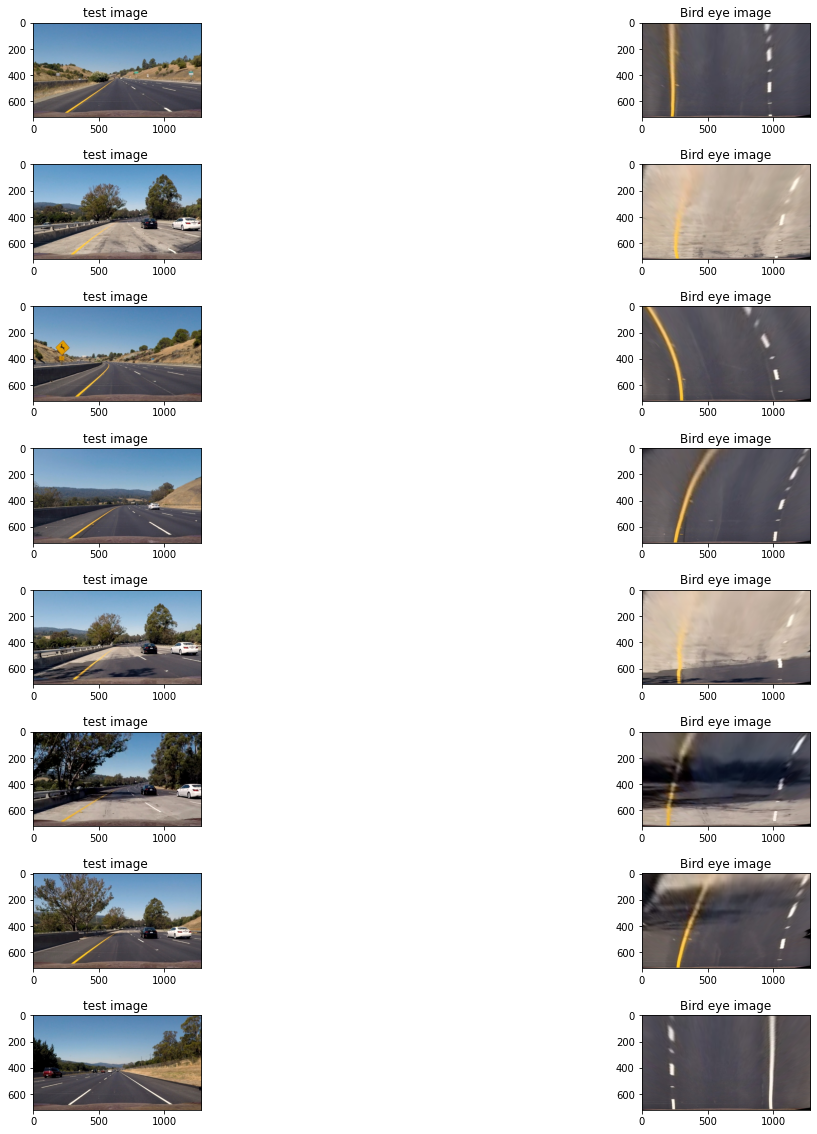

In [6]:

#obtain the view in the bird eye prespect
offset=200
height, width= image_test1.shape[0], image_test1.shape[1]
src=np.float32([(593,450),(700,450),(1200,700),(200,700)])
dst=np.float32([(offset,0),(width-offset,0),(width-offset,height),(offset,height)])
# here we obtain the prespective transfor by applying the inverse prespective matrix then applying prespective transform to the image and obtaining the warped imag

def wi(img):
    img_size = (img.shape[1], img.shape[0])
    M= cv2.getPerspectiveTransform(src, dst) 
    inv= cv2.getPerspectiveTransform(dst, src)
    warped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,inv

def revewarp(img,M):
    img_size = (img.shape[1], img.shape[0])
    unwarped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return unwarped

f,axes= plt.subplots(len(test_images),2, figsize=(20,20))
f.subplots_adjust(hspace=0.5)
row=0
Unwarped_images=[]

#converting our imgage from BGR to RGB
def BGR_RGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for image in test_images:
    image= BGR_RGB(image)
    unwarped_image,inv= wi(image)
    Unwarped_images.append(unwarped_image)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].imshow(image)
    axes[row,0].set_title('test image ')
    axes[row,1].imshow(unwarped_image)
    axes[row,1].set_title("Bird eye image")
    row+=1    

In [7]:
#in order to distinguish the lane lines (L,R,y,s channels from Lab colorspace,RGB,YCrCb, HSV , Y are picked up) 
def channelwise_thresholding(image,thresh):
    image = image*(255/np.max(image))
    #  L channel applying
    binary_output = np.zeros_like(image)
    binary_output[(image > thresh[0]) & (image <= thresh[1])] = 1
    return binary_output

In [8]:
def Custom_channel_converter(img):
    
    img1=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)[:,:,0] 
    img2=cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)[:,:,1] 
    img3=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)[:,:,1] 
    img4=cv2.cvtColor(img,cv2.COLOR_RGB2HLS)[:,:,2] 
    return img1, img2, img3, img4

In [9]:
def sobel_image(img, orient='x', thresh_min=0, thresh_max=255, convert=True):
    
    
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobel=None
    if(orient=='x'):
        sobel= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    else:
        sobel= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    sobel_abs= np.absolute(sobel)
    sobel_8bit= np.uint8(255* sobel_abs/np.max(sobel_abs))
    binary_output= np.zeros_like(sobel_8bit) 
    binary_output[(sobel_8bit>=thresh_min) & (thresh_max>=sobel_8bit)]=1
    
    return binary_output

In [10]:
def sobel_mag(img, thresh, convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    mag= (sobelx**2+ sobely**2)**(0.5)
    
    sobel_mag_8bit= np.uint8(255* mag/np.max(mag))
    binary_output= np.zeros_like(sobel_mag_8bit) 
    binary_output[(sobel_mag_8bit>=thresh[0]) & (thresh[1]>=sobel_mag_8bit)]=1
    
    return binary_output

In [11]:
def sobel_gradient_image(img, thresh=(0, np.pi/2), convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray=cv2.GaussianBlur(img, (3, 3), 0)
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=15)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=15)
    
    abs_sobelx= np.absolute(sobelx)
    abs_sobely= np.absolute(sobely)
    
    grad= np.arctan2(abs_sobely, abs_sobelx)
    
    binary_output=np.zeros_like(grad)
    binary_output[(grad>thresh[0])&(grad<thresh[1])]=1
    return binary_output

In [12]:
fit_prev_left=[]
fit_prev_right=[]
fit_sum_left=0
fit_sum_right=0
def Plot_line(binary_warped, smoothen=False,prevFrameCount=6 ): 
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    lane_width= abs(rightx_base-leftx_base)
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
     # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if(smoothen):
        global fit_prev_left
        global fit_prev_right
        global fit_sum_left
        global fit_sum_right
        if(len(fit_prev_left)>prevFrameCount):
            fit_sum_left-= fit_prev_left.pop(0)
            fit_sum_right-= fit_prev_right.pop(0)

        fit_prev_left.append(left_fit)
        fit_prev_right.append(right_fit)
        fit_sum_left+=left_fit
        fit_sum_right+= right_fit

        no_of_fit_values=len(fit_prev_left) 
        left_fit= fit_sum_left/no_of_fit_values
        right_fit= fit_sum_right/no_of_fit_values
        
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    window_img = np.zeros_like(out_img)
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    return out_img, result, left_fitx,right_fitx,ploty,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width


In [13]:
def draw_lane(original_img, Combined_img, left_fitx, right_fitx, M):
    new_img = np.copy(original_img)

    warp_zero = np.zeros_like(Combined_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = Combined_img.shape
    ploty = np.linspace(0, h-1, num=h)

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(255,0,0), thickness=15)

    return color_warp, new_img


In [14]:
#Caclulating the distance of car from center
center_distances= Queue(maxsize=15)
distanceSum=0
def get_car_position(l_fit, r_fit,w,h):
    xm_per_pix=3.7/700
    center_dist=0
    lane_center_position=0
    if r_fit is not None and l_fit is not None:
        car_position = w/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    
    global distanceSum           
    if(center_distances.full()):
        el=center_distances.get()
        distanceSum-=el
    
    center_distances.put(center_dist)
    distanceSum+=center_dist
    
    no_of_distance_values=center_distances.qsize() 
    center_dist= distanceSum/no_of_distance_values
    return center_dist,lane_center_position

In [15]:
def get_direction(center_dist):
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    return direction

In [16]:
def Plot_details(laneImage,curv_rad,center_dist,width_lane,lane_center_position):
    offest_top=0
    copy= np.zeros_like(laneImage)
    
    h = laneImage.shape[0]
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    text = 'Radius of curvature =' + '{:04.2f}'.format(curv_rad) + '(m)'
    cv2.putText(laneImage, text, (40,70+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(copy, text, (40,100+offest_top), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    abs_center_dist = abs(center_dist)
    direction= get_direction(center_dist)
    text = 'Vehicle is '+'{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'

    cv2.putText(laneImage, '|', (640,710), font, 2.0, (255,255,255), 3, cv2.LINE_AA)
    cv2.putText(laneImage, '|', (int(lane_center_position),680), font, 2.0, (255,0,0), 3, cv2.LINE_AA)
    cv2.putText(laneImage, text, (40,120+offest_top), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    
    
    return laneImage, copy

In [17]:
# Radius of curvature
width_lane_avg=[]
radius_values = Queue(maxsize=15)
radius_sum=0

def calc_radius_position(combined, l_fit, r_fit, l_lane_inds, r_lane_inds,lane_width):
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_curverad, right_curverad, center_dist, width_lane = (0, 0, 0, 0)
    h = combined.shape[0]
    w = combined.shape[1]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = combined.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        
        #applying the formula for 
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        
        width_lane= lane_width*xm_per_pix
        if(len(width_lane_avg) != 0):
            avg_width=(sum(width_lane_avg)/len(width_lane_avg))
            if abs(avg_width-width_lane)<0.5:
                width_lane_avg.append(width_lane)
            else:
                width_lane=avg_width
    
    # Averaging radius value over past 15 frames
    global radius_sum           
    if(radius_values.full()):
        el=radius_values.get()
        
        radius_sum-=el
    curve_radius= (left_curverad+right_curverad)/2
    radius_values.put(curve_radius)
    radius_sum+=curve_radius
    
    no_of_radius_values=radius_values.qsize() 
    curve_radius= radius_sum/no_of_radius_values
    
    center_dist,lane_center_position= get_car_position(l_fit,r_fit,w,h) #getting the car distance from the center
    return curve_radius, center_dist,width_lane,lane_center_position

In [18]:
def Lane_pipeline(img,smoothen,prevFrameCount):
    undistorted_image= undistort(img)
    warped_image,M= wi(undistorted_image)
    image_S_channel= cv2.cvtColor(warped_image, cv2.COLOR_RGB2HLS)[:,:,2]
    
    imgY, imgCr, imgb, imgS= Custom_channel_converter(warped_image)
    
    Ybinary= channelwise_thresholding(imgY,(215,255))
    Crbinary= channelwise_thresholding(imgCr,(215,255))
    Lbinary= channelwise_thresholding(imgb,(215,255))
    Sbinary= channelwise_thresholding(imgS,(200,255))
    combined = np.zeros_like(imgY)
    

    sobel_image1= sobel_image(image_S_channel,'x', 15,60, False)
    sobel_grad_image= sobel_gradient_image(image_S_channel,  (0.5,1.8), False)
    combined[(Crbinary==1)|(Ybinary==1)|((Lbinary==1)&(Sbinary==1))] = 1

    

    out_img,out_img1, left_fitx,right_fitx,ploty,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width= Plot_line(combined,smoothen,prevFrameCount)
    curverad,center_dist,width_lane,lane_center_position= calc_radius_position(combined,left_fit, right_fit,left_lane_inds,right_lane_inds,lane_width)
    laneImage,new_img =draw_lane(img, combined, left_fitx, right_fitx, M)
    unwarped_image= revewarp(laneImage,M)
    laneImage = cv2.addWeighted(new_img, 1, unwarped_image, 0.5, 0)
    laneImage, copy = Plot_details(laneImage,curverad,center_dist,width_lane,lane_center_position)
    return img,out_img,out_img1,unwarped_image,laneImage,combined,copy


    

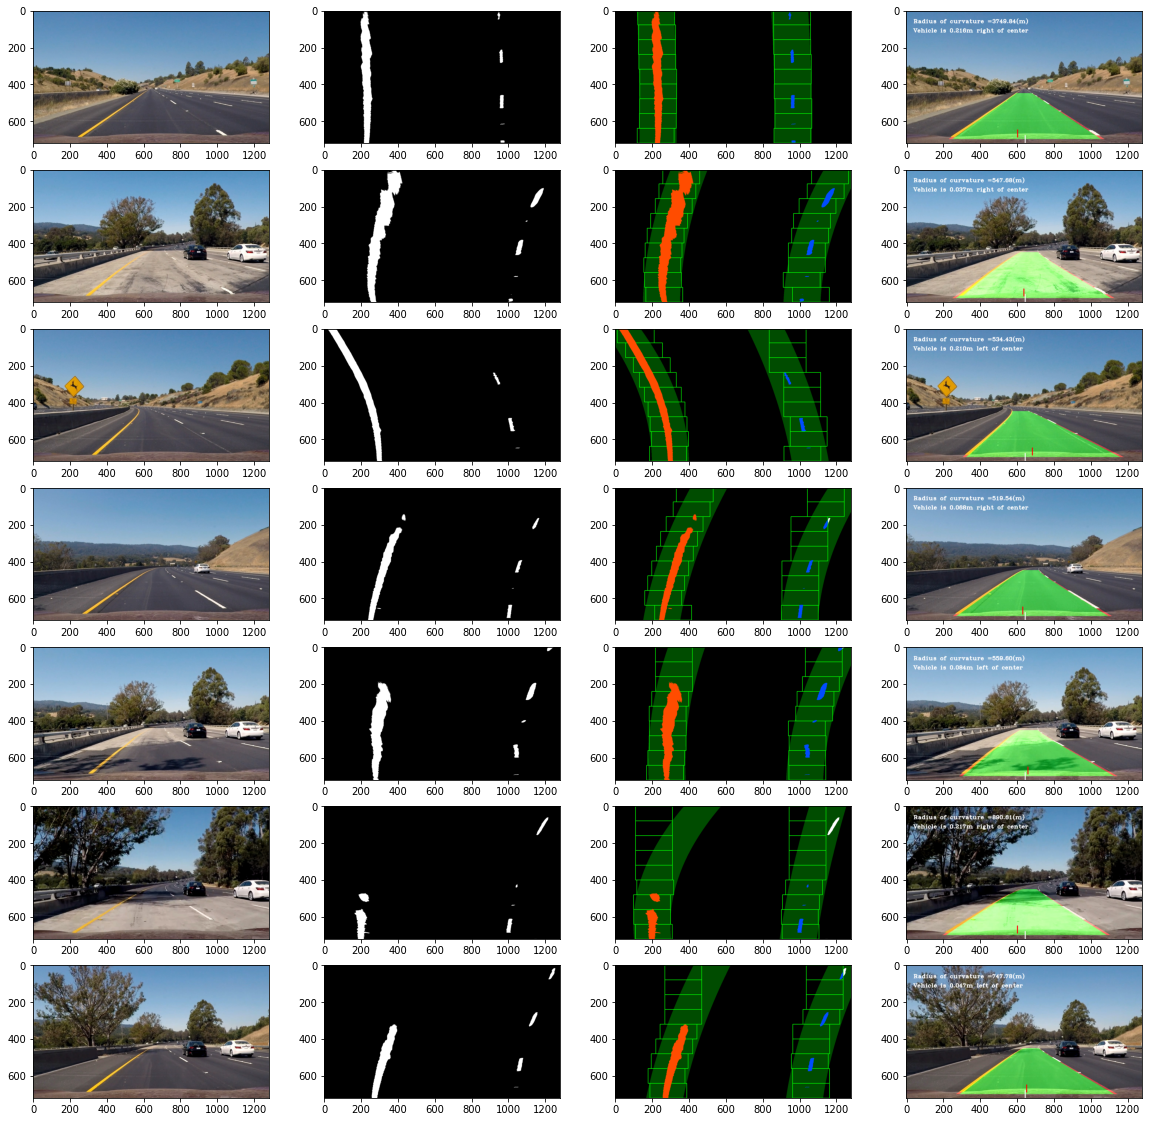

In [19]:
X= '1'
if X=='1':
    f,axes= plt.subplots(7,4, figsize=(20,20))
    row=0
    for index in range(7):  
        fit_prev_left=[]
        fit_prev_right=[]
        fit_sum_left=0
        fit_sum_right=0
        radius_sum=0
        radius_values.queue.clear()
        center_distances.queue.clear()
        distanceSum=0
    
        image= test_images[index]
        image= BGR_RGB(image)
        rgb_image,out_img,out_img1,unwarped_image,laneImage,combined,copy= Lane_pipeline(image, False,0)
      
        axes[row,0].imshow(rgb_image)
        axes[row,1].imshow(combined, cmap='gray')
        axes[row,2].imshow(out_img1)
        axes[row,3].imshow(laneImage)
        row+=1
        


In [20]:
def CallPipeline(image):
    smoothen= True
    prevFrameCount=4
    rgb_image,out_img,out_img1,unwarped_image,laneImage,combined,data_copy= Lane_pipeline(image,smoothen,prevFrameCount)
    
     
    
    if x=='1':
        out_image = np.zeros((720,1280,3), dtype=np.uint8)
    #stacking up various images in one output Image
        out_image[0:720,0:1280,:] = cv2.resize(laneImage,(1280,720)) #top-left
        out_image[20:190,960:1260,:] = cv2.resize(np.dstack((combined*255, combined*255, combined*255)),(300,170))#side Panel
        out_image[210:380,960:1260,:] = cv2.resize(out_img,(300,170))#side Panel
#     out_image[400:570,960:1260,:] = cv2.resize(data_copy,(300,170))#bottom-left
        return out_image
    return laneImage

In [25]:
path_input=input("Insert the dir of the video you want to detect ")
path_output=input("Insert the file path where you want the video to be placed")

Insert the dir of the video you want to detect E:/asu/summer 22/vision/wait/Lane_detection_opencv-main/Project_data/project_video.mp4
Insert the file path where you want the video to be placedE:/asu/summer 22/vision/wait/Lane_detection_opencv-main/Project_data/project_videoo.mp4


In [26]:
video_output1 = path_output
video_input1 = VideoFileClip(path_input)
processed_video = video_input1.fl_image(CallPipeline)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

Moviepy - Building video E:/asu/summer 22/vision/wait/Lane_detection_opencv-main/Project_data/project_videoo.mp4.
Moviepy - Writing video E:/asu/summer 22/vision/wait/Lane_detection_opencv-main/Project_data/project_videoo.mp4



Moviepy - Done !
Moviepy - video ready E:/asu/summer 22/vision/wait/Lane_detection_opencv-main/Project_data/project_videoo.mp4
CPU times: total: 6min 18s
Wall time: 5min 1s
